# Aula 1 - Seu primeiro Colab com Python e Pandas

Na primeira aula, eles apresentaram o Google Colab, como ter acesso a ele e sua vantagem de não haver necessidade de criar uma conta em uma plataforma diferente, ou de fazer o download de um software para executar as atividades da imersão. Em seguida, a base de dados foi apresentada. Originalmente, ela foi retirada do Kaggle, e para respeitar as diretrizes da LGPD, os dados foram tratados pelo Thiago, que retirou algumas informações para não identificar pessoas ou locais, e posteriormente foi disponibilizada através de um link. Para efetuar uma visualização dos dados, inicialmente, foi usado a biblioteca Pandas, que ajuda a tratar e manipular as variáveis de acordo com a proposta do projeto.

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
# pega de forma aleatória n linhas do dataframe
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9703,"Rua Luís Sérgio Person, 181",Parque Mandaqui,São Paulo,139,2,2,2,R$ 398.000
4995,Rua Duílio Santo Suosso,Jardim Tenani,São Paulo,180,4,5,6,R$ 1.360.000
8898,Rua do Ceuta,Jardim Luzitânia,São Paulo,597,3,5,4,R$ 4.900.000
8628,NaN,Vila Vera,São Paulo,225,3,1,2,R$ 795.000
6486,"Rua Cristiano Viana, 1331",Cerqueira César,São Paulo,286,4,5,7,R$ 2.999.800
2874,Rua Joaquim Cândido de Azevedo Marques,Vila Morumbi,São Paulo,900,3,6,10,R$ 18.000.000
4382,Rua Capote Valente,Pinheiros,São Paulo,136,3,3,3,R$ 2.200.000
7159,Rua Vicente José de Almeida,Cupecê,São Paulo,218,3,5,3,R$ 1.150.000
3369,NaN,Vila Olímpia,São Paulo,165,3,5,3,R$ 2.900.000
3857,Rua Morgado de Mateus,Vila Mariana,São Paulo,263,4,3,2,R$ 2.250.000


A forma escolhida para iniciar uma análise da base de dados foi a visualização da variável ‘Bairro’. Por ter um número de linhas muito grande, por padrão, ao chamar o dataframe, o pandas apresenta as cinco primeiras e as cinco últimas linhas. 

In [ ]:
dados['Bairro']

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [ ]:
# Para buscar uma linha expecífica na coluna 'Bairro'
dados['Bairro'][6522]

'Vila Paulo Silas'

Para ter uma visão geral dos dados foi utilizado o método `.info()`, que apresenta a quantidade total de linhas (10.008 registros), colunas (8 variáveis), a quantidade de linhas que possuem valores preenchidos (ou seja, não nulo) e qual tipo de dado há em cada variável.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
# Fazer a média da metragem dos imóveis e outra forma de selecionar uma coluna, usando 'df.variável'
dados.Metragem.mean()

# A média da Metragem dos 10.008 registros é de 442m

442.30065947242207

Nesta hora, foi perguntado como seria possível verificar se há registros do bairro Vila Mariana. A solução proposta pelo Thiago foi a seguinte: somar todas as aparições do valor ‘Vila Mariana’ para ver quantos registros há no dataset, que no caso foram 184 residências cadastradas. Com esta informação, ele atribuiu o comando usado para somar os registros à uma variável, que devolveu algo parecido quando somente os bairros foram solicitados, porém com ‘True’ para Vila Mariana e ‘False’ para os demais bairros.

In [ ]:
sum(dados['Bairro'] == 'Vila Mariana')

184

In [ ]:
tem_imoveis_vila_mariana = (dados['Bairro'] == 'Vila Mariana')
tem_imoveis_vila_mariana

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

Ao lançar este último resultado ao dataset original, teve-se como resposta um dataframe composto somente pelos registros da Vila Mariana. Para manipular estes registros, ele foi novamente atribuído a outra variável. Como exemplo, verificou-se a média da metragem do bairro, que foi de 233m, valor menor do que a média de todos os imóveis.

In [ ]:
imoveis_vila_mariana = dados[tem_imoveis_vila_mariana]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [ ]:
imoveis_vila_mariana['Metragem'].mean()

233.6195652173913

E para encerrar o conteúdo da aula, foi apresentada a função `value_counts()` que conta e apresenta, em ordem decrescente, os cinco valores que mais apareceram no dataframe e os cinco últimos. Como exemplo, foi feita a contagem da variável Bairro, que apresentou o registro de 701 bairros diferentes. Ao  atribuir a seleção de bairros a uma variável, foi possível plotar um gráfico.

In [ ]:
# value_counts() devolve a quantidade de vezes que uma variável apareceu
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

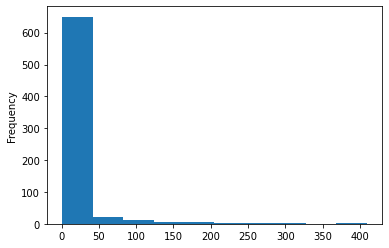

In [ ]:
# Plotando um histograma

n_imoveis_bairro = dados['Bairro'].value_counts()
n_imoveis_bairro.plot.hist();

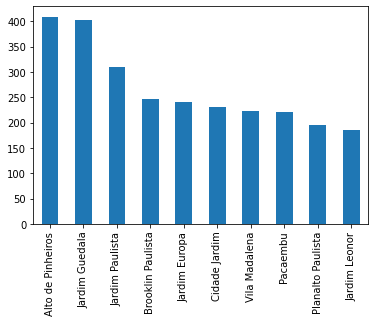

In [ ]:
# Mostrando os 10 bairros que mais aparecem

n_imoveis_bairro.head(10).plot.bar();

# Desafios aula 1

Desafio (Paulo):

1 - Realizar a média de metragem por bairro;

Desafio (Thiago):

1 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas);

2 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DataFrame, tentar colocar alguma conclusão;

Desafio (Vivian):

1 - Pegar outras estatísticas dos dados, média, mediana, min, máx;

2 - Descobrir quais são os bairros que não tem nome de Rua.

In [ ]:
# média de metragem por bairro

bairro_metragem = dados.groupby(['Bairro'])['Metragem'].agg('mean').round(2)
bairro_metragem

Bairro
Aclimação            253.06
Alto da Boa Vista    418.88
Alto da Lapa         294.34
Alto da Mooca        270.05
Alto de Pinheiros    433.44
                      ...  
Vila Água Funda      152.20
Água Branca          191.00
Água Fria            165.42
Água Funda           139.00
Água Rasa            340.25
Name: Metragem, Length: 701, dtype: float64

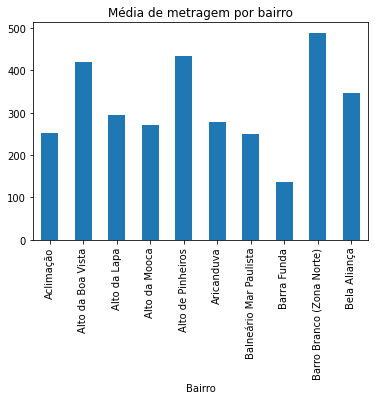

In [ ]:
bairro_metragem.head(10).plot.bar(title='Média de metragem por bairro');

In [ ]:
# Mostrar a metragem de forma decrescente

bairro_metragem.sort_values(ascending=False).round(2)

Bairro
Sítio Represa                         37000.00
Vila Castelo                           2850.00
Jardim Guedala                         2486.64
Jardim das Camélias                    1700.00
Chácara Flora                          1260.73
                                        ...   
Cidade Antônio Estevão de Carvalho       57.50
Jardim Nova Germania                     57.00
Jardim Benfica                           48.00
Vila Leonor                              46.00
Vila Guaca                               10.00
Name: Metragem, Length: 701, dtype: float64

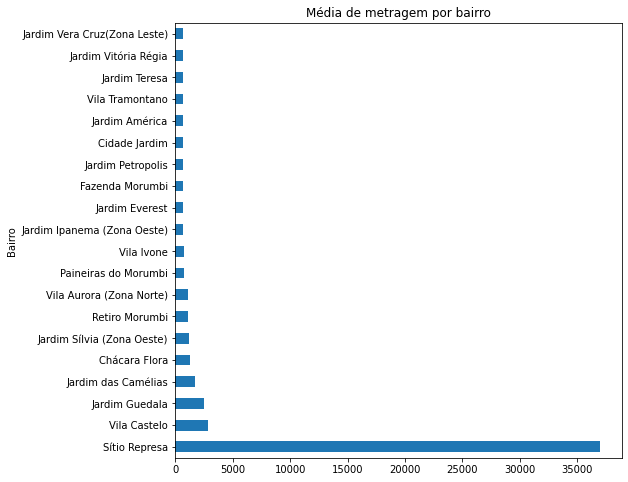

In [ ]:
# Apresentando a média com outro gráfico
bairro_metragem.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,8), title='Média de metragem por bairro');

Provável que só haja um registro em Sítio Represa, pois o valor está muito diferente quando comparado com os outros bairros.

In [ ]:
# Para comprovar a hipótese:
sum(dados['Bairro'] == 'Sítio Represa')

1

In [ ]:
# Selecionando coluna 'Bairro' de outra forma

dados.Bairro

0         Planalto Paulista
1        Jardim dos Estados
2           Jardim Reimberg
3            Jardim Morumbi
4                     Mooca
                ...        
10003            Vila Sofia
10004       Bosque da Saúde
10005         Vila da Saúde
10006         Vila Oratório
10007           Vila Alpina
Name: Bairro, Length: 10008, dtype: object

In [ ]:
# Desafio Thiago
# Apresentando a média de quartos por bairro
media_quartos_por_bairro = dados.groupby(['Bairro'])['Quartos'].agg('mean').round(2)
media_quartos_por_bairro

Bairro
Aclimação            3.32
Alto da Boa Vista    4.12
Alto da Lapa         3.15
Alto da Mooca        3.30
Alto de Pinheiros    3.94
                     ... 
Vila Água Funda      2.60
Água Branca          3.15
Água Fria            2.83
Água Funda           3.00
Água Rasa            3.50
Name: Quartos, Length: 701, dtype: float64

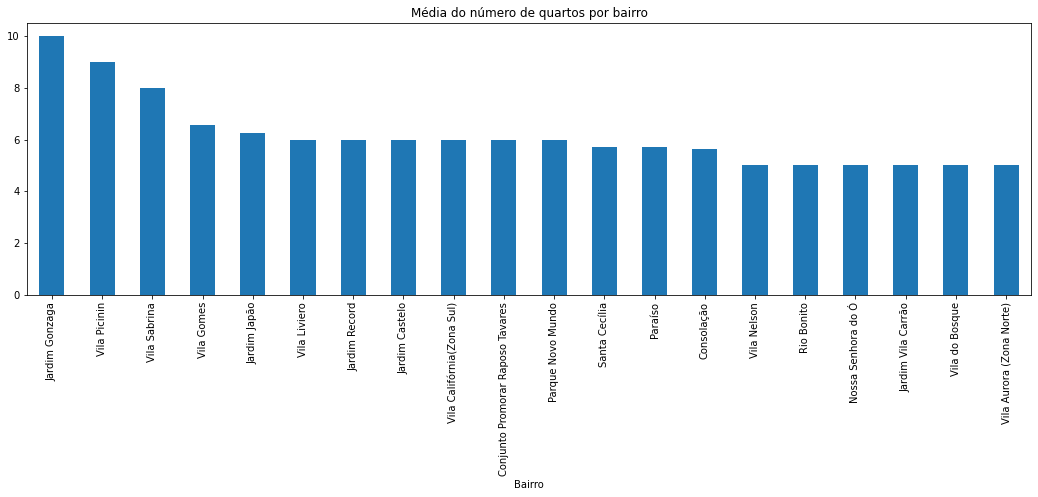

In [ ]:
media_quartos_por_bairro.sort_values(ascending=False).head(20).plot(kind='bar',
                                                                    figsize=(18,5), 
                                                                    title='Média do número de quartos por bairro');

Provável que haja poucos registros de imóveis nos bairros Jardim Gonzaga e Vila Picinin, devido ao alto número de quartos.

In [ ]:
# Teste de hipótese
sum(dados['Bairro'] == 'Jardim Gonzaga')

4

In [ ]:
sum(dados['Bairro'] == 'Vila Picinin')

1

In [ ]:
# Verificando o número de banheiros presentes no dataset
total_banheiros = dados.groupby('Banheiros').size()
total_banheiros

Banheiros
1     1034
2     1632
3     1952
4     1838
5     1615
6     1037
7      488
8      284
9       62
10      36
11      15
12       8
14       4
16       1
40       2
dtype: int64

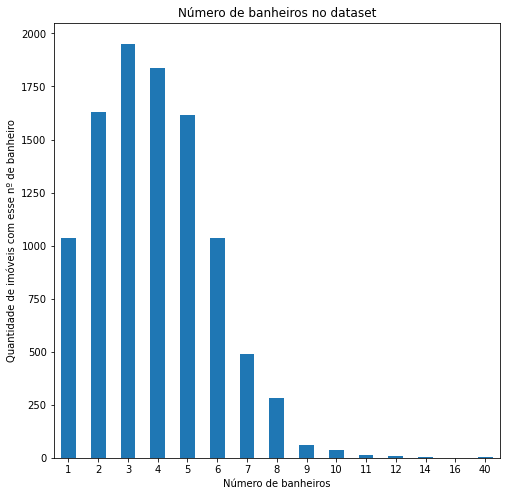

In [ ]:
total_banheiros.plot(kind='bar',
                     figsize=(8,8), 
                     title='Número de banheiros no dataset',
                     xlabel='Número de banheiros',
                     rot=0,
                     ylabel='Quantidade de imóveis com esse nº de banheiro');

In [ ]:
# Verificando qual imóvel possui 40 banheiros
quarenta_banheiros = (dados['Banheiros'] == 40)
quarenta_banheiros

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Banheiros, Length: 10008, dtype: bool

In [ ]:
# Deve haver algum erro, pois os imóveis possuem 4 quartos e 40 banheiros
dados[quarenta_banheiros]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000


In [ ]:
# Verificando a mediana da metragem por bairros
mediana_bairros = dados.groupby(['Bairro'])['Metragem'].agg('median')
mediana_bairros

Bairro
Aclimação            227.5
Alto da Boa Vista    378.0
Alto da Lapa         255.0
Alto da Mooca        182.5
Alto de Pinheiros    412.0
                     ...  
Vila Água Funda      143.0
Água Branca          174.0
Água Fria            174.5
Água Funda           139.0
Água Rasa            180.0
Name: Metragem, Length: 701, dtype: float64

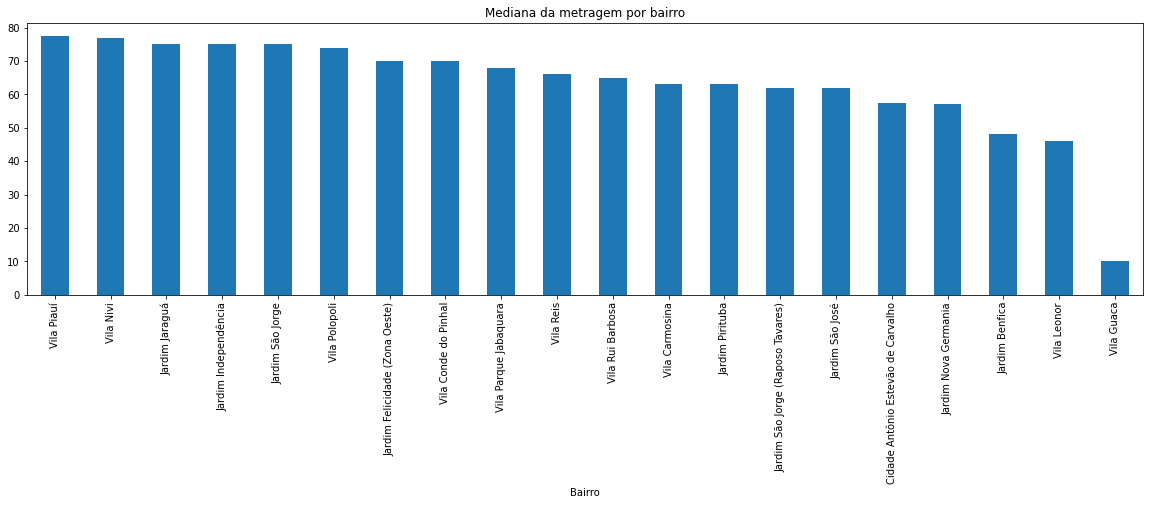

In [ ]:
# Apresentando os 20 bairros com menor mediana
mediana_bairros.sort_values(ascending=False).tail(20).plot(kind='bar', 
                                                           title='Mediana da metragem por bairro',
                                                           figsize=(20,5));

In [ ]:
# Verificando as maiores metragens por bairro
maximo_bairros = dados.groupby(['Bairro'])['Metragem'].agg('max')
maximo_bairros

Bairro
Aclimação            1500
Alto da Boa Vista     595
Alto da Lapa         1133
Alto da Mooca         805
Alto de Pinheiros    1530
                     ... 
Vila Água Funda       200
Água Branca           400
Água Fria             314
Água Funda            153
Água Rasa             805
Name: Metragem, Length: 701, dtype: int64

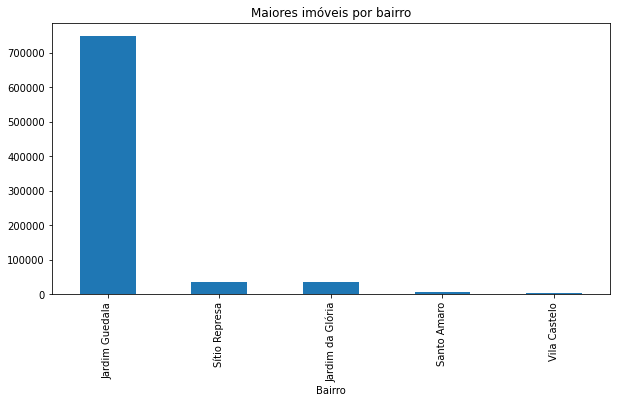

In [ ]:
maximo_bairros.sort_values(ascending=False).head(5).plot(kind='bar', 
                                                         title='Maiores imóveis por bairro',
                                                         figsize=(10,5));

In [ ]:
# Verificando os menores registros de Metragem por bairro
minimo_bairros = dados.groupby(['Bairro'])['Metragem'].agg('min')
minimo_bairros

Bairro
Aclimação            104
Alto da Boa Vista    315
Alto da Lapa          46
Alto da Mooca         84
Alto de Pinheiros    100
                    ... 
Vila Água Funda       90
Água Branca           91
Água Fria             60
Água Funda           125
Água Rasa             86
Name: Metragem, Length: 701, dtype: int64

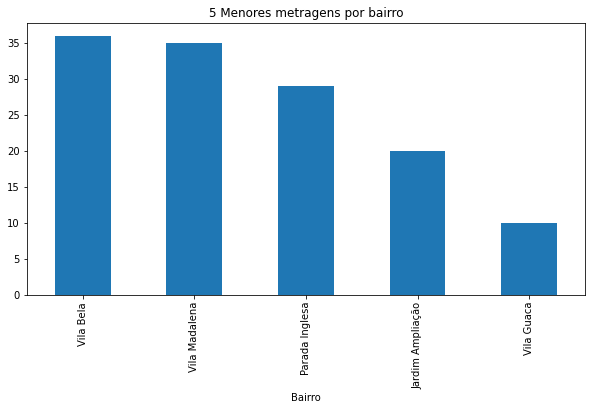

In [ ]:
minimo_bairros.sort_values(ascending=False).tail(5).plot(kind='bar', 
                                                         title='5 Menores metragens por bairro',
                                                         figsize=(10,5));

In [ ]:
# Verificando quais imóveis que não possuem endereço 

rua_nan = pd.isna(dados['Rua'])
rua_nan

0        False
1        False
2        False
3         True
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Rua, Length: 10008, dtype: bool

In [ ]:
sem_rua = dados[rua_nan]
sem_rua

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [ ]:
# Verificando quais bairros não possuem o cadastro da Rua do imóvel
sem_rua['Bairro']

3                         Jardim Morumbi
11                      Jardim Luzitânia
31                        Parque da Lapa
56      Chácara Santo Antônio (Zona Sul)
57                        Jardim Guedala
                      ...               
9963                   Jardim Petrópolis
9989                Parque Alves de Lima
9991                        Vila Formosa
9995                       Jardim Leonor
9999                   Jardim Petrópolis
Name: Bairro, Length: 3434, dtype: object

In [ ]:
# Dos 3434 imóveis que não possuem a Rua, eles estão distribuídos em 394 bairros
sem_rua['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

Há 394 bairros no dataframe que não possuem o registro da rua do imóvel

# Aula 2 - Tratamento de dados e primeiros gráficos

In [ ]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Na segunda aula, começamos a tratar os dados, iniciando pela variável Valor. Ela foi escolhida porque seu tipo não permitia realizar nenhum cálculo, já que ela está como ‘object’, ou seja, do tipo texto.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados['Valor'][0]

'R$ 7.000.000'

A forma escolhida para extrair a parte numérica do valor, foi usar usar o método ‘split()’ para separar a moeda (‘R$’) do valor. Porém, nada garante que o dataset inteiro esteja seguindo este padrão, pode haver casos em que foi adicionado outra informação depois do valor. 

In [ ]:
dados['Valor'][0].split()

['R$', '7.000.000']

Para verificar esta hipótese, foi utilizado o método ‘.sample()’ que apresenta algumas linhas do dataset de forma aleatória. Na aula, a amostra dos dados apresentou que há casos em que o valor do imóvel é seguido por ‘/Mês’.

In [ ]:
dados.sample(15)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2566,NaN,Santo Amaro,São Paulo,164,4,3,2,R$ 905.000
7623,NaN,Alto de Pinheiros,São Paulo,307,4,5,4,R$ 2.900.000
9718,"Rua Orlando Ferraiuolo, 428",Vila Brasilina,São Paulo,250,3,3,4,R$ 689.000
5106,Rua Visconde de Ourem,Jardim Aeroporto,São Paulo,100,2,2,1,R$ 490.000
9450,Rua das Hortênsias,Mirandópolis,São Paulo,170,3,4,2,R$ 936.000
6770,NaN,Jardim Paulista,São Paulo,420,4,4,2,R$ 3.800.000
4161,Rua Kalil Nader Habr,Vila Santo Estéfano,São Paulo,175,4,3,3,R$ 720.000
6545,NaN,Parque Imperial,São Paulo,120,2,3,3,R$ 600.000
7261,NaN,Vila Monumento,São Paulo,279,3,1,2,R$ 750.000
4066,Rua Graham Bell,Santo Amaro,São Paulo,445,4,3,5,R$ 1.980.000


In [ ]:
dados['Valor'].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

Assim, foi determinado que a coluna Valor seria dividida em 3 colunas, uma para receber a moeda em que o imóvel está sendo negociado, a segunda para receber o valor, enquanto a última recebe as informações adicionais.

In [ ]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


A função ‘unique()’ foi usada para verificar em todas as linhas quais valores há em cada coluna, na coluna 0 só foi encontrado ‘R$’, confirmando que todos os imóveis foram negociados em real. A coluna 1 apresentou 1038 valores distintos, enquanto na coluna 2 há a ocorrência de quatro valores: ‘None’ quando não foi adicionado nada após o valor do imóvel, ‘/Mês’, ‘/Ano’ e ‘/Dia’ provavelmente representando um período de aluguel do imóvel.

In [ ]:
# Uma forma de mostrar o que contêm na coluna
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
len(dados['Valor'].str.split(expand = True)[1].unique())

1038

In [ ]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Cientes dessas informações, estas três colunas foram adicionadas ao dataframe original sob as variáveis ‘Moeda’, ‘Valor_anincio’ e ‘Tipo_anuncio’.

In [ ]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


O foco do projeto está nos imóveis que estão à venda, por isso decidiu-se eliminar os imóveis que aparentam ser de aluguel, como uma forma de evitar que eles alterem o resultado final, já que o valor pago em um aluguel mensal (ou qualquer outro período) difere muito do valor de venda.

In [ ]:
# Eliminando anúncios do tipo aluguel ('/Mês', '/Ano', '/Dia')
dados["Tipo_anuncio"].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [ ]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

Para que o dataframe carregue esta alteração, ele foi atribuído a uma nova variável.

In [ ]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


Ao verificar as informações deste novo dataframe, observa-se que ele tem 9156 registros.

In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


Mesmo com o tratamento da coluna Valor, ainda não é possível efetuar nenhum cálculo com a variável ‘Valor_anuncio’, pois, além de ainda ser do tipo ‘object’, as classes de milhões e milhares dos valores estão separados por ‘.’, algo que o Python usa para separar os valores inteiros dos decimais. Por isso a mudança desta variável para o tipo numérico, haverá um erro. O método apresentado pelo Thiago para resolver esta questão, foi: retirar os ‘.’ e depois fazer a mudança para o tipo numérico.

In [ ]:
# Tirando os '.' da coluna 'Valor_anuncio' e tentando fazer a média

dados_vendas["Valor_anuncio"].str.replace(".","").mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [ ]:
# Convertendo a coluna 'Valor_anuncio' para o tipo numérico

dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [ ]:
# Atrinuindo os valores tratados a uma nova variável

dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Assim, tem-se um dataframe com uma nova variável numérica.

In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


Ao tratar esta variável, foi possível ter uma ideia de como estão os valores dos imóveis. Primeiro, plotando um histograma para verificar a distribuição dos valores e com qual frequência eles aparecem.

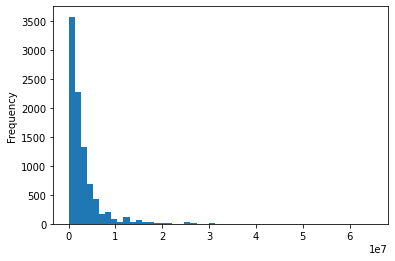

In [ ]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

Depois foi apresentado o método ‘.describe()’ que apresenta dados estatísticos sobre as variáveis numéricas do dataframe. De cima para baixo, tem-se ‘count’, ‘mean’, ‘std’, ‘min’, ‘25%’, ‘50%’, ‘75%’ e ‘max’.
* ‘count’ apresenta o número de linhas com valores não nulos;
* ‘mean’ é a média amostral da variável;
* ‘std’ é o desvio padrão da variável; 
* ‘min’ é o valor mínimo encontrado;
* ‘25%’, ‘50%’, ‘75%’ que são os percentis da variável;
* ‘max’ é o valor máximo.



In [ ]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


Para limitar o número de casas decimais depois da vírgula, foi feito uma personalização com o `set_option()` limitando a duas casas decimais.


In [ ]:
pd.set_option("display.precision", 2)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9.16e+03
mean,434.42,3.45,3.80,3.96,3.05e+06
std,7856.42,1.05,1.97,2.60,3.94e+06
min,10.00,1.00,1.00,1.00,1.30e+04
25%,168.00,3.00,2.00,2.00,8.90e+05
50%,276.00,3.00,4.00,4.00,1.80e+06
75%,450.00,4.00,5.00,5.00,3.50e+06
max,750000.00,16.00,40.00,50.00,6.50e+07


Porém a variável ‘Valor_anuncio_float’ ainda está sendo apresentada na forma exponencial, para deixar padronizado a apresentação de todas as variáveis numéricas, foi feita outra personalização.

In [ ]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
# Mostrando a descrição de todas as variáveis do data frame

dados_vendas.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [ ]:
# Mostrando apenas sobre as variáveis do tipo 'object'

dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


Para visualizar melhor os dados, foi apresentado o Seaborn, que é outra biblioteca do Python baseada em Matplotlib, que oferece diversas formas de plotar gráficos estatísticos.

In [ ]:
import seaborn as sns

Como um primeiro exemplo, foi feito um histograma dos valores dos imóveis.

Obs.: 'kde' mostrou a linha de comportameto do histograma

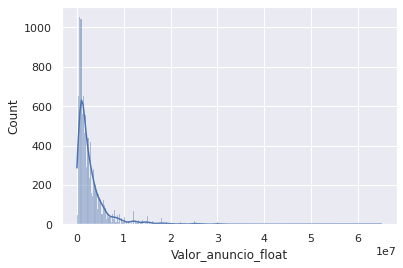

In [ ]:
sns.set()
sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True);

Aproveitando o gráfico, também foi apresentado o Matplotlib e como fazer um histograma, similar ao anterior, utilizando esta biblioteca.

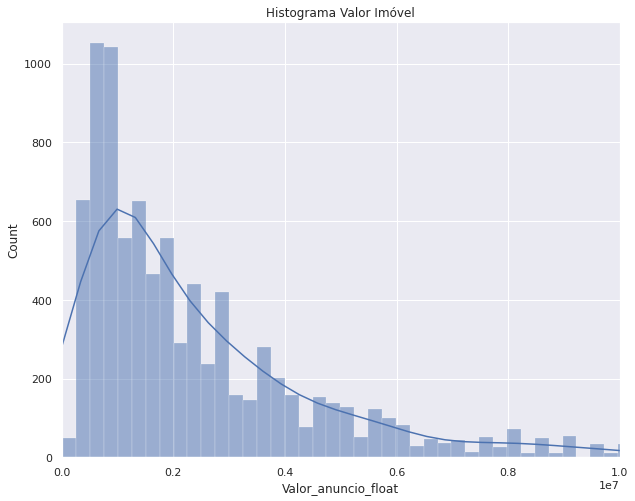

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True);
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

# Desafios Aula 2:

1. Criar uma escala de valores em milhões;
2. Fazer um gráfico com o 'Galeritas';
3. Deixar o gráfico do histograma Valor Imóvel legível, alterando as labels, cores, título, escala e melhorar o storytelling;
4. Preço do m² por bairro, descobrir no Seaborn como mostrar este dado no formato de gráfico ideal;
5. Explorar as bibliotecas de visualizações, e colocar as suas conclusões;
6. Pesquisar visualização para analisar os quartis, mediana, outliers.


## Escala de valores em milhões / alterando histograma

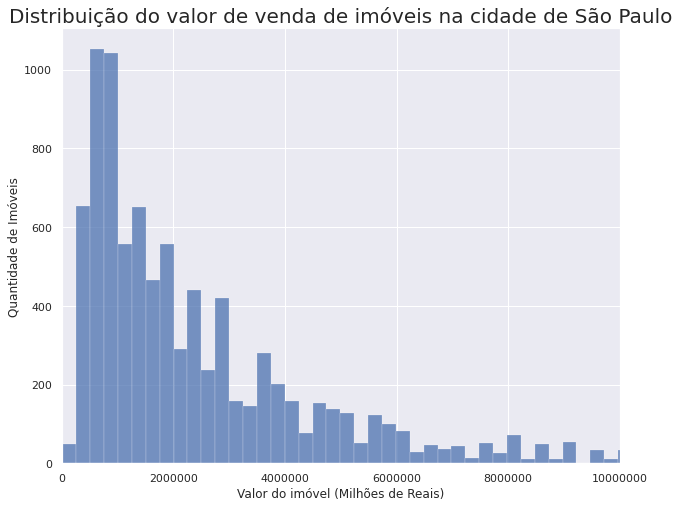

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float");
ax.set_title("Histograma Valor Imóvel")
#plt.xticks([0, 200000, 500000, 1000000, 2000000, 5000000])
plt.xlabel('Valor do imóvel (Milhões de Reais)')
plt.xlim((-50, 10000000))
plt.ylabel('Quantidade de Imóveis')
plt.title('Distribuição do valor de venda de imóveis na cidade de São Paulo', fontsize=20)
plt.ticklabel_format(style='plain')
plt.show()

## Preço por metro quadrado

A forma que  pensei para calcular o preço do metro quadrado, foi a seguinte:
* Criar um novo data frame somente com as variáveis que eu usaria, que no caso foram Bairro, Valor_anuncio_float e Metragem, sob a variável bairro_valor_metragem;

In [ ]:
bairro_valor_metragem = dados_vendas[['Bairro', 'Valor_anuncio_float', 'Metragem']]
bairro_valor_metragem

,Bairro,Valor_anuncio_float,Metragem
0,Planalto Paulista,7000000.00,1000
1,Jardim dos Estados,3700000.00,496
2,Jardim Reimberg,380000.00,125
3,Jardim Morumbi,685000.00,310
4,Mooca,540000.00,100
...,...,...,...
10002,Planalto Paulista,1500000.00,267
10003,Vila Sofia,665000.00,95
10004,Bosque da Saúde,2300000.00,605
10005,Vila da Saúde,1050000.00,205


* Fazer um ‘group_by’ por Bairro e calcular a média das outras duas variáveis, sob a variável ‘media_por_bairro’;

In [ ]:
media_por_bairro = bairro_valor_metragem.groupby(by=["Bairro"])[['Valor_anuncio_float', 'Metragem']].mean()
media_por_bairro

,Valor_anuncio_float,Metragem
Bairro,,
Aclimação,1763200.01,246.16
Alto da Boa Vista,2391250.00,418.88
Alto da Lapa,2083168.75,299.25
Alto da Mooca,1184170.00,270.05
Alto de Pinheiros,4782698.96,429.85
...,...,...
Vila Água Funda,652000.00,152.20
Água Branca,1226500.00,173.58
Água Fria,927083.33,165.42


* Eu poderia ter renomeado o data frame ‘media_por_bairro’, mas decidi fazer uma cópia e nomeá-lo como ‘valor_medio_por_bairro’;

In [ ]:
import copy
valor_medio_por_bairro = media_por_bairro.copy()
valor_medio_por_bairro

,Valor_anuncio_float,Metragem
Bairro,,
Aclimação,1763200.01,246.16
Alto da Boa Vista,2391250.00,418.88
Alto da Lapa,2083168.75,299.25
Alto da Mooca,1184170.00,270.05
Alto de Pinheiros,4782698.96,429.85
...,...,...
Vila Água Funda,652000.00,152.20
Água Branca,1226500.00,173.58
Água Fria,927083.33,165.42


*  Por fim, fiz um ‘for’ para fazer a divisão entre o valor do anúncio com a metragem, o resultado da conta seria adicionado a uma coluna nova, ‘Metro_quadrado’.

In [ ]:
for index, row in valor_medio_por_bairro.iterrows():
  valor_medio_por_bairro.loc[index, 'Metro_quadrado'] = row['Valor_anuncio_float']/row['Metragem']

In [ ]:
valor_medio_por_bairro

,Valor_anuncio_float,Metragem,Metro_quadrado
Bairro,,,
Aclimação,1763200.01,246.16,7162.69
Alto da Boa Vista,2391250.00,418.88,5708.74
Alto da Lapa,2083168.75,299.25,6961.30
Alto da Mooca,1184170.00,270.05,4385.00
Alto de Pinheiros,4782698.96,429.85,11126.34
...,...,...,...
Vila Água Funda,652000.00,152.20,4283.84
Água Branca,1226500.00,173.58,7065.77
Água Fria,927083.33,165.42,5604.53


## Testando o group_by e merge

In [ ]:
minimo_por_bairro = bairro_valor_metragem.groupby(by=["Bairro"])[['Valor_anuncio_float', 'Metragem']].min()
minimo_por_bairro

,Valor_anuncio_float,Metragem
Bairro,,
Aclimação,790000.00,104
Alto da Boa Vista,1680000.00,315
Alto da Lapa,650000.00,46
Alto da Mooca,530000.00,84
Alto de Pinheiros,1180000.00,100
...,...,...
Vila Água Funda,370000.00,90
Água Branca,580000.00,91
Água Fria,395000.00,60


In [ ]:
maximo_por_bairro = bairro_valor_metragem.groupby(by=["Bairro"])[['Valor_anuncio_float', 'Metragem']].max()
maximo_por_bairro

,Valor_anuncio_float,Metragem
Bairro,,
Aclimação,5000000.00,1500
Alto da Boa Vista,3200000.00,595
Alto da Lapa,9000000.00,1133
Alto da Mooca,2000000.00,805
Alto de Pinheiros,18000000.00,1530
...,...,...
Vila Água Funda,850000.00,200
Água Branca,2500000.00,350
Água Fria,1300000.00,314


In [ ]:
valor_min_max = pd.merge(minimo_por_bairro, maximo_por_bairro, how = 'inner', on = 'Bairro')
valor_min_max

,Valor_anuncio_float_x,Metragem_x,Valor_anuncio_float_y,Metragem_y
Bairro,,,,
Aclimação,790000.00,104,5000000.00,1500
Alto da Boa Vista,1680000.00,315,3200000.00,595
Alto da Lapa,650000.00,46,9000000.00,1133
Alto da Mooca,530000.00,84,2000000.00,805
Alto de Pinheiros,1180000.00,100,18000000.00,1530
...,...,...,...,...
Vila Água Funda,370000.00,90,850000.00,200
Água Branca,580000.00,91,2500000.00,350
Água Fria,395000.00,60,1300000.00,314


In [ ]:
valor_min_max_medio = pd.merge(valor_min_max, media_por_bairro, how = 'inner', on = 'Bairro')
valor_min_max_medio

,Valor_anuncio_float_x,Metragem_x,Valor_anuncio_float_y,Metragem_y,Valor_anuncio_float,Metragem
Bairro,,,,,,
Aclimação,790000.00,104,5000000.00,1500,1763200.01,246.16
Alto da Boa Vista,1680000.00,315,3200000.00,595,2391250.00,418.88
Alto da Lapa,650000.00,46,9000000.00,1133,2083168.75,299.25
Alto da Mooca,530000.00,84,2000000.00,805,1184170.00,270.05
Alto de Pinheiros,1180000.00,100,18000000.00,1530,4782698.96,429.85
...,...,...,...,...,...,...
Vila Água Funda,370000.00,90,850000.00,200,652000.00,152.20
Água Branca,580000.00,91,2500000.00,350,1226500.00,173.58
Água Fria,395000.00,60,1300000.00,314,927083.33,165.42


In [ ]:
valor_min_max_medio.rename(columns={'Valor_anuncio_float_x': 'Valor_min', 
                           'Metragem_x': 'Metragem_min'}, inplace=True)

In [ ]:
valor_min_max_medio

,Valor_min,Metragem_min,Valor_anuncio_float_y,Metragem_y,Valor_anuncio_float,Metragem
Bairro,,,,,,
Aclimação,790000.00,104,5000000.00,1500,1763200.01,246.16
Alto da Boa Vista,1680000.00,315,3200000.00,595,2391250.00,418.88
Alto da Lapa,650000.00,46,9000000.00,1133,2083168.75,299.25
Alto da Mooca,530000.00,84,2000000.00,805,1184170.00,270.05
Alto de Pinheiros,1180000.00,100,18000000.00,1530,4782698.96,429.85
...,...,...,...,...,...,...
Vila Água Funda,370000.00,90,850000.00,200,652000.00,152.20
Água Branca,580000.00,91,2500000.00,350,1226500.00,173.58
Água Fria,395000.00,60,1300000.00,314,927083.33,165.42


In [ ]:
valor_min_max_medio.rename(columns={'Valor_anuncio_float_y': 'Valor_max', 
                           'Metragem_y': 'Metragem_max',
                           'Valor_anuncio_float': 'Valor_medio',
                           'Metragem': 'Metragem_media'}, inplace=True)

In [ ]:
valor_min_max_medio

,Valor_min,Metragem_min,Valor_max,Metragem_max,Valor_medio,Metragem_media
Bairro,,,,,,
Aclimação,790000.00,104,5000000.00,1500,1763200.01,246.16
Alto da Boa Vista,1680000.00,315,3200000.00,595,2391250.00,418.88
Alto da Lapa,650000.00,46,9000000.00,1133,2083168.75,299.25
Alto da Mooca,530000.00,84,2000000.00,805,1184170.00,270.05
Alto de Pinheiros,1180000.00,100,18000000.00,1530,4782698.96,429.85
...,...,...,...,...,...,...
Vila Água Funda,370000.00,90,850000.00,200,652000.00,152.20
Água Branca,580000.00,91,2500000.00,350,1226500.00,173.58
Água Fria,395000.00,60,1300000.00,314,927083.33,165.42


In [ ]:
aleatorio = valor_min_max_medio.sample(5)
aleatorio

,Valor_min,Metragem_min,Valor_max,Metragem_max,Valor_medio,Metragem_media
Bairro,,,,,,
Vila Tolstoi,650000.00,240,890000.00,250,770000.00,245.00
Jardim da Saúde,660000.00,96,3800000.00,600,1269624.39,241.93
Jardim Primavera (Zona Sul),401100.00,179,401100.00,179,401100.00,179.00
Capão Redondo,690000.00,125,690000.00,125,690000.00,125.00
Vila Zelina,990000.00,210,1600000.00,332,1322500.00,274.75


In [ ]:
aleatorio.describe()

,Valor_min,Metragem_min,Valor_max,Metragem_max,Valor_medio,Metragem_media
count,5.00,5.00,5.00,5.00,5.00,5.00
mean,678220.00,170.00,1476220.00,297.20,890644.88,213.14
std,209325.92,59.33,1372311.35,186.25,395155.68,60.36
min,401100.00,96.00,401100.00,125.00,401100.00,125.00
25%,650000.00,125.00,690000.00,179.00,690000.00,179.00
50%,660000.00,179.00,890000.00,250.00,770000.00,241.93
75%,690000.00,210.00,1600000.00,332.00,1269624.39,245.00
max,990000.00,240.00,3800000.00,600.00,1322500.00,274.75


## Gráfico com o 'Galeritas'

In [ ]:
!pip install galeritas
import galeritas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 297 kB 6.3 MB/s 
     |████████████████████████████████| 11.2 MB 46.8 MB/s 
     |████████████████████████████████| 930 kB 49.7 MB/s 
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is in

Na Aula 1, quando a função ‘count’ foi apresentada, o bairro Alto de Pinheiros tinha o maior número de registros, por isso selecionei somente os registros deste bairro e plotei uma distribuição empírica dos valores destes imóveis.

In [ ]:
dados_vendas[dados_vendas.Bairro == 'Alto de Pinheiros']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
83,"Rua Carlos Rath, 103",Alto de Pinheiros,São Paulo,400,5,4,4,R$ 2.900.000,R$,2.900.000,None,2900000.00
84,NaN,Alto de Pinheiros,São Paulo,358,4,4,4,R$ 3.500.000,R$,3.500.000,None,3500000.00
137,"Rua Aquiramun, 94",Alto de Pinheiros,São Paulo,450,5,6,5,R$ 5.500.000,R$,5.500.000,None,5500000.00
214,"Rua Açaré, 63",Alto de Pinheiros,São Paulo,252,3,5,4,R$ 2.900.000,R$,2.900.000,None,2900000.00
227,NaN,Alto de Pinheiros,São Paulo,360,3,5,4,R$ 4.950.000,R$,4.950.000,None,4950000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9691,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000,R$,2.650.000,None,2650000.00
9696,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000,R$,2.150.000,None,2150000.00
9727,NaN,Alto de Pinheiros,São Paulo,466,7,6,7,R$ 2.650.000,R$,2.650.000,None,2650000.00
9732,Rua Sebastião Rodrigues,Alto de Pinheiros,São Paulo,150,3,2,2,R$ 2.150.000,R$,2.150.000,None,2150000.00


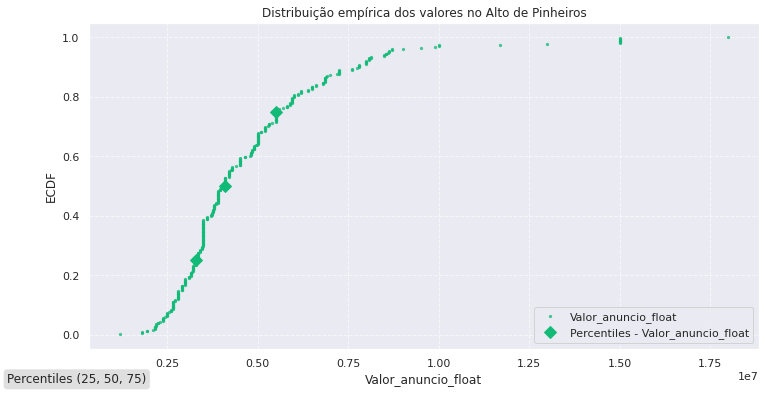

In [ ]:
from galeritas import plot_ecdf_curve

df = dados_vendas[dados_vendas.Bairro == 'Alto de Pinheiros']

plot_ecdf_curve(
    df,
    column_to_plot ='Valor_anuncio_float',
    # hue='Bairro',
    figsize=(12, 6),
    plot_title='Distribuição empírica dos valores no Alto de Pinheiros'
)

## Explorar as bibliotecas de visualizações, e colocar as suas conclusões

Ainda com base nos maiores números de ocorrência na variável Bairro, escolhi trabalhar com os dados do bairro Jardim Guedala, o segundo com maior ocorrência, já que o Alto de Pinheiros foi trabalhado no gráfico da biblioteca Galeritas.

In [ ]:
dados_vendas['Bairro'].value_counts()

Alto de Pinheiros      369
Jardim Guedala         353
Jardim Paulista        266
Brooklin Paulista      224
Jardim Europa          210
                      ... 
Vila Virginia            1
Vila Boaçava             1
Vila Agueda              1
Jardim Monte Alegre      1
Jardim Ivana             1
Name: Bairro, Length: 697, dtype: int64

Assim como foi feito com a Vila Mariana, selecionei apenas o Jardim Guedala.

In [ ]:
soh_jd_guedala = (dados_vendas['Bairro'] == 'Jardim Guedala')
soh_jd_guedala

0        False
1        False
2        False
3        False
4        False
         ...  
10002    False
10003    False
10004    False
10005    False
10007    False
Name: Bairro, Length: 9156, dtype: bool

In [ ]:
guedala = dados_vendas[soh_jd_guedala]
guedala

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000,R$,5.500.000,None,5500000.00
88,NaN,Jardim Guedala,São Paulo,650,4,7,4,R$ 3.500.000,R$,3.500.000,None,3500000.00
99,NaN,Jardim Guedala,São Paulo,354,4,6,4,R$ 2.950.000,R$,2.950.000,None,2950000.00
177,NaN,Jardim Guedala,São Paulo,420,3,6,5,R$ 3.500.000,R$,3.500.000,None,3500000.00
245,NaN,Jardim Guedala,São Paulo,584,4,6,4,R$ 2.950.000,R$,2.950.000,None,2950000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Rua Albertina de Oliveira Godinho,Jardim Guedala,São Paulo,1305,5,7,6,R$ 5.900.000,R$,5.900.000,None,5900000.00
9958,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,R$ 5.000.000,R$,5.000.000,None,5000000.00
9984,Rua Alvorada do Sul,Jardim Guedala,São Paulo,605,5,7,5,R$ 8.000.000,R$,8.000.000,None,8000000.00
9985,Rua Albertina de Oliveira Godinho,Jardim Guedala,São Paulo,1305,5,7,6,R$ 5.900.000,R$,5.900.000,None,5900000.00


In [ ]:
guedala['Valor_anuncio_float'].describe()

count        353.00
mean     5102452.09
std      2966828.36
min      1450000.00
25%      3150000.00
50%      4200000.00
75%      6000000.00
max     18000000.00
Name: Valor_anuncio_float, dtype: float64

Fiz um gráfico para visualizar como está a distribuição de preço do bairro.

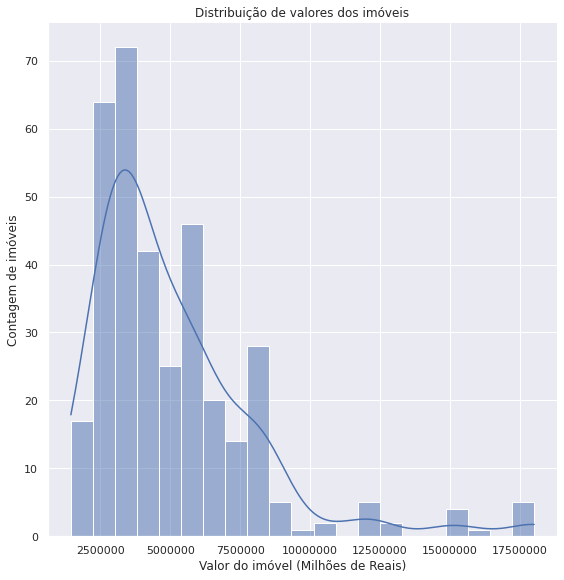

In [ ]:
ax = sns.displot(data=guedala, x="Valor_anuncio_float", 
                 height=8, 
                 aspect=1, 
                 kde = True).set(title='Distribuição de valores dos imóveis')
plt.xlabel('Valor do imóvel (Milhões de Reais)')
plt.ylabel('Contagem de imóveis')
plt.ticklabel_format(style='plain', axis='x') # Remove a notação ciêntífica
plt.show()

Dos 353 imóveis registrados no bairro Jardim Guedala, a maioria está na faixa de 2,5 a 5,0 milhões de reais.


## Como analisar quartis, mediana e outliers

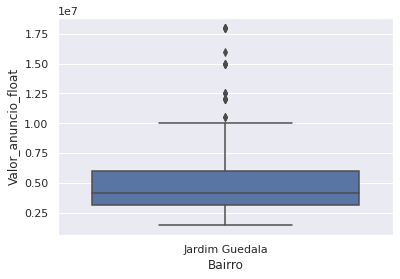

In [ ]:
sns.boxplot(x='Bairro', y='Valor_anuncio_float', data=guedala);

A página da [Gisely Alves](https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb) fez uma descrição interessante sobre o boxplot:

*   Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados, cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, e assim por diante.
*   Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
*   O corte do 2º quartil é igual a mediana.
*   Outliers são observações atípicas, muito afastadas da maioria dos dados. Em um boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

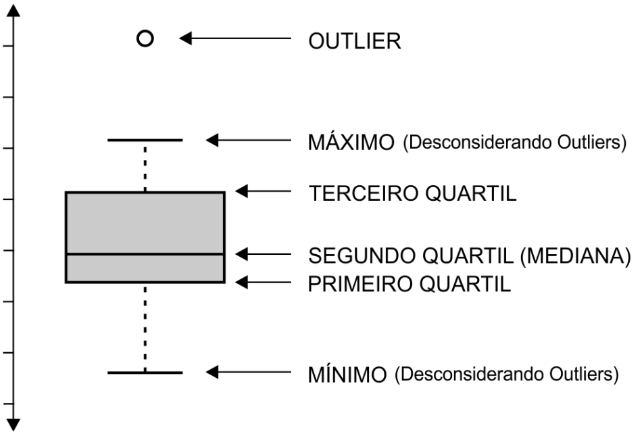

# Aula 3 - Gráficos, Time Series e Análise Exploratória

## Como eles calcularam o perço do metro quadrado:

No início da terceira aula, foi corrigido o desafio de como calcular o preço do metro quadrado por bairro, como uma forma de evitar o erro de acabar calculando a média das médias de alguma variável. Primeiro, foi criada uma nova coluna (‘Valor_m2’) para receber o resultado da divisão entre o valor do imóvel pela metragem de cada linha.

In [ ]:
dados_vendas["Valor_m2"] = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem']
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


Ao fazer um ‘group_by’ por bairro e solicitar a média, o valor presente na coluna ‘Valor_m2’ será referente à média de valores provenientes de outra conta.

In [ ]:
dados_vendas.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


Para comprovar que o resultado obtido é uma leitura equivocada, foi feito um novo agrupamento por bairro, porém somando as variáveis desta vez.

In [ ]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


Só então foi solicitado a divisão entre o ‘Valor_anuncio_float’ e ‘Metragem’, que ao comparar as cinco primeiras linhas com o que fiz no desafio da aula anterior, os resultados conferem.

In [ ]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [ ]:
# O '.loc' foi usado, porque o index do DataFrame virou a coluna 'Bairro'
dados_bairro.loc["Vila Mariana"]

Metragem                  39079.00
Quartos                     573.00
Banheiros                   547.00
Vagas                       499.00
Valor_anuncio_float   299326000.00
Valor_m2                1337323.16
Valor_m2_bairro            7659.51
Name: Vila Mariana, dtype: float64

In [ ]:
dados_bairro.loc["Vila Mariana"]["Valor_m2_bairro"]

7659.510222881855

In [ ]:
dados_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

## Plotando o gráfico com 10 bairros

Tendo o valor do metro quadrado, o Paulo solicitou a apresentação dos 10 bairros com mais registros no dataframe. Para tanto, foi feito um ‘value_counts’ que mostrasse o top 10.

In [ ]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

Para facilitar a manipulação dos dados, o index numérico foi restaurado.

In [ ]:
# Ao invés de criar uma variável para receber as configurações, também dá para usar o 'inplace = True' que dá na mesma
dados_bairro.reset_index(inplace=True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


Com a nova configuração, foi solicitado a apresentação desses 10 bairros.

In [ ]:
# Selecionando só as linhas com os top 10 Bairro
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


E o plot do gráfico.

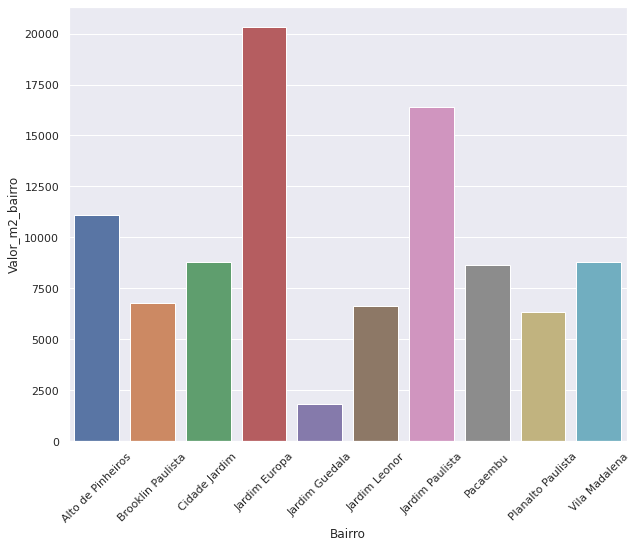

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
# Roacionando o tick (que são os 'índices' na label) em 45°
ax.tick_params(axis='x', rotation=45)

## Boxplot

Aproveitando que estava-se trabalhando com um conjunto menor de dados, plotamos um boxplot, que deixou a visualização dos valores mínimos, medianas e outliers mais claros.

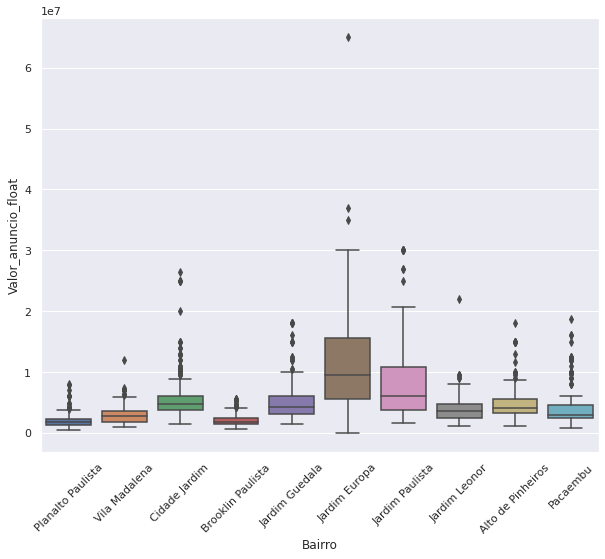

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x='Bairro', y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

Também foi apresentada uma forma de eliminar alguns outliers, por exemplo ao solicitar apenas imóveis com metragem inferior a 30.000 metros. Porém, tanto a Vivian quanto o Thiago chamaram a atenção para este tipo de tratamento, pois dependendo do caso a presença do outlier se faz necessária, do mesmo modo que a presença deles pode atrapalhar a análise do dado. Por isso, faz-se necessária uma boa leitura do negócio antes de tratar os dados e eliminar outliers.

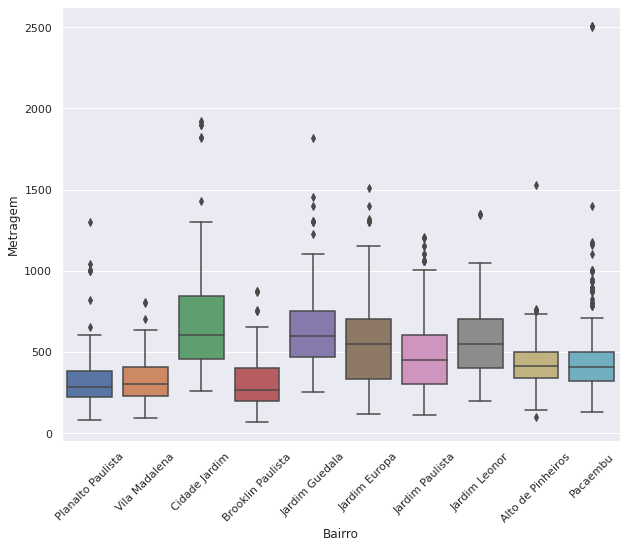

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x='Bairro', y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Dados do IBGE

E para encerrar, fomos apresentados aos dados do IBGE, que seriam utilizados na próxima aula.

In [ ]:
ibge_sp = pd.read_csv(
    "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv",
    encoding='ISO-8859-1',
    sep = ';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


# Desafios - Aula 3:

1.   Remover o outlier do Jardim Europa e ver se dá diferença com o primeiro boxplot;
2.   Tentar vincular dados do IBGE com os dados de imóveis;
3.   'Brincar' um pouco com o 'groupby', agrupando por mais de uma categoria e realizar as análises;
4.   Organizar o Colab.



## Removendo todos os outliers

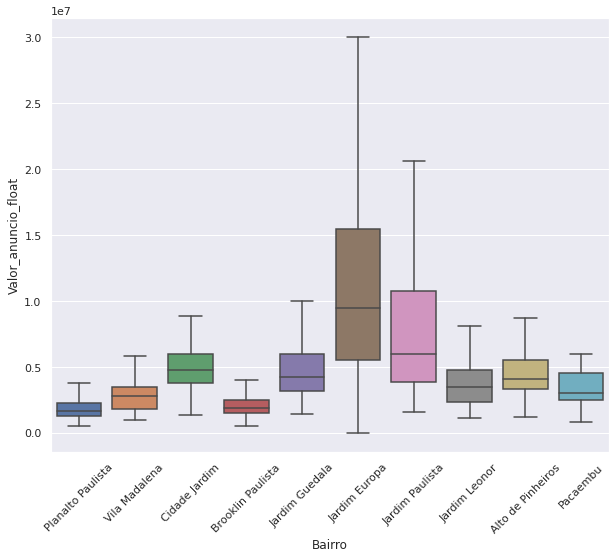

In [ ]:
import seaborn as sb

plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x='Bairro', y="Valor_anuncio_float", showfliers=False)
ax.tick_params(axis='x', rotation=45)
plt.show()

## Descobrindo o índice do imóvel mais caro do Jardim Europa

In [ ]:
jd_europa = dados_vendas.Bairro == 'Jardim Europa'
jd_europa

0        False
1        False
2        False
3        False
4        False
         ...  
10002    False
10003    False
10004    False
10005    False
10007    False
Name: Bairro, Length: 9156, dtype: bool

In [ ]:
soh_jd_europa = dados_vendas[jd_europa]
soh_jd_europa

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,R$ 13.000,R$,13.000,None,13000.00,65.00
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,R$ 37.000.000,R$,37.000.000,None,37000000.00,48941.80
140,Rua Rússia,Jardim Europa,São Paulo,200,3,3,2,R$ 2.700.000,R$,2.700.000,None,2700000.00,13500.00
150,NaN,Jardim Europa,São Paulo,693,4,5,6,R$ 16.000.000,R$,16.000.000,None,16000000.00,23088.02
195,Rua Itália,Jardim Europa,São Paulo,713,5,7,6,R$ 26.600.000,R$,26.600.000,None,26600000.00,37307.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,Rua Turquia,Jardim Europa,São Paulo,765,3,1,5,R$ 13.900.000,R$,13.900.000,None,13900000.00,18169.93
9593,"Rua Holanda, 192",Jardim Europa,São Paulo,720,5,10,8,R$ 13.499.900,R$,13.499.900,None,13499900.00,18749.86
9604,NaN,Jardim Europa,São Paulo,800,4,7,6,R$ 11.980.000,R$,11.980.000,None,11980000.00,14975.00
9760,NaN,Jardim Europa,São Paulo,580,3,5,3,R$ 5.200.000,R$,5.200.000,None,5200000.00,8965.52


In [ ]:
soh_jd_europa.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,210.00,210.00,210.00,210.00,210.00,210.00
mean,566.18,3.79,4.73,5.03,11496061.43,19962.69
std,272.42,0.89,1.91,2.85,7692530.82,7179.78
min,120.00,1.00,1.00,1.00,13000.00,65.00
25%,335.50,3.00,3.00,3.00,5500000.00,14580.32
50%,550.50,4.00,5.00,4.00,9500000.00,19144.61
75%,705.00,4.00,6.00,6.75,15500000.00,23750.64
max,1510.00,7.00,10.00,20.00,65000000.00,48941.80


In [ ]:
mais_caro = soh_jd_europa.Valor_anuncio_float == 65000000.00
mais_caro

60      False
102     False
140     False
150     False
195     False
        ...  
9580    False
9593    False
9604    False
9760    False
9823    False
Name: Valor_anuncio_float, Length: 210, dtype: bool

In [ ]:
o_mais_caro = soh_jd_europa[mais_caro]
o_mais_caro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,R$ 65.000.000,R$,65.000.000,None,65000000.00,43046.36


In [ ]:
sem_o_mais_caro = dados_vendas.copy()
sem_o_mais_caro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


Eliminando o imóvel mais caro.

In [ ]:
sem_o_mais_caro.drop(index=400, inplace=True)
sem_o_mais_caro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


In [ ]:
top_dez_bairros = sem_o_mais_caro["Bairro"].value_counts()[:10].index
top_dez_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [ ]:
sem_o_mais_caro.query("Bairro in @top_dez_bairros")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
23,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,R$ 1.485.000,R$,1.485.000,None,1485000.00,8735.29
30,Rua dos Plátanos,Cidade Jardim,São Paulo,1195,4,4,6,R$ 8.700.000,R$,8.700.000,None,8700000.00,7280.33
39,Rua Gregório Paes de Almeida,Vila Madalena,São Paulo,401,5,9,4,R$ 3.890.000,R$,3.890.000,None,3890000.00,9700.75
40,Avenida das Magnólias,Cidade Jardim,São Paulo,420,4,4,4,R$ 2.200.000,R$,2.200.000,None,2200000.00,5238.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,Rua Bragança,Pacaembu,São Paulo,285,3,4,5,R$ 2.450.000,R$,2.450.000,None,2450000.00,8596.49
9994,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,R$ 5.000.000,R$,5.000.000,None,5000000.00,7633.59
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000,R$,9.500.000,None,9500000.00,7037.04
10000,Rua Bauru,Pacaembu,São Paulo,439,2,3,2,R$ 5.200.000,R$,5.200.000,None,5200000.00,11845.10


Refazendo o boxplot:

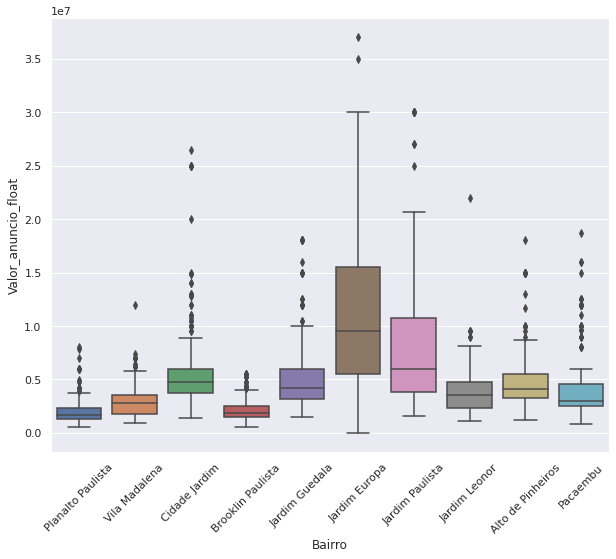

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = sem_o_mais_caro.query("Bairro in @top_bairros"), x='Bairro', y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

Houve uma melhora na visualização de todos os bairros, com a retirada do imóvel de R$65.000.000,00 do Jardim Europa.

## Brincando com o 'groupby'

In [ ]:
ibge_sp['Nome_do_distrito']

0        ï¿½GUA RASA
1        ï¿½GUA RASA
2        ï¿½GUA RASA
3        ï¿½GUA RASA
4        ï¿½GUA RASA
            ...     
18358        LAJEADO
18359        LAJEADO
18360        LAJEADO
18361        LAJEADO
18362        LAJEADO
Name: Nome_do_distrito, Length: 18363, dtype: object

In [ ]:
'JARDIM EUROPA' in ibge_sp['Nome_do_distrito']

False

No banco de dados do IBGE, a variável que mais se aproxima com a variável 'Bairro', do primeiro dataframe que utilizamos, é 'Nome_do_distrito'. Voltando a considerar o top 10 Bairros, o Jardim Europa apresentou valores altos, no entanto não há registro deste bairro no banco de dados do IBGE. Por isso verifica-se a combinação entre os registros de outro bairro com o valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (variável 'V005'). 

Na ausência de 'Jardim Europa', optei por 'Jardim Paulista', que possui os seguintes registros no IBGE:

In [ ]:
jardim_paulista = ibge_sp.groupby('Nome_do_distrito').get_group('JARDIM PAULISTA')
jardim_paulista

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
8826,355030845000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.26,1.37,10593.01,453872062.20,12122.49,501116022.24,6717.18,258860952.43,9748.63,346416300.42
8827,355030845000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.02,1.37,5919.16,18989803.84,5996.54,18772637.26,4366.77,17636414.74,5422.07,16170524.98
8828,355030845000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.60,2.29,6939.25,42898215.62,8189.17,40373677.18,4221.53,30530459.33,6083.97,32675760.37
8829,355030845000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.07,1.31,7600.15,357214178.03,8327.82,385506090.94,6032.04,206747587.03,7573.34,248033212.83
8830,355030845000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.61,1.69,11247.42,204300563.18,12599.28,211859877.26,5657.71,112379442.89,8842.11,147570651.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,355030845000211,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.47,1.36,4449.08,19798409.92,5250.72,19150684.93,2842.31,14396656.40,4407.02,15431617.98
9036,355030845000212,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.20,1.26,4390.93,14019181.59,4904.16,13135108.11,2822.97,10768732.73,3582.32,10945735.55
9037,355030845000213,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,1.67,0.74,5276.01,31813241.62,5795.50,31935326.61,4481.39,27462422.34,5211.56,28133019.00
9038,355030845000214,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,1.78,0.99,5343.65,29132250.10,5975.69,28799305.79,4402.98,27786051.89,5199.57,28674123.12


In [ ]:
# Outra forma de ter o mesmo resultado
# ibge_sp.loc[ibge_sp['Nome_do_distrito'] == 'JARDIM PAULISTA']

Verificando a média do rendimento nominal do bairro:

In [ ]:
jardim_paulista.groupby('Nome_do_distrito').agg({'V005':'mean'})

,V005
Nome_do_distrito,
JARDIM PAULISTA,7264.79


Baseado nos dados do IBGE, o rendimento médio nominal mensal dos responsáveis pelos imóveis registrados no Jardim Paulista é de R$7.264,79.

In [ ]:
jardim_paulista.groupby('Nome_do_distrito').agg({'V005':'median'})

,V005
Nome_do_distrito,
JARDIM PAULISTA,6525.56


A mediana da renda neste bairro mostrou-se inferior à media de rendimento mensal.

In [ ]:
dados_bairro.groupby('Bairro').get_group('Jardim Paulista')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70


Segundo a tabela referente aos imóveis à venda, o metro quadrado no bairro Jardim Paulista é de R$16.395,70. 

Ou seja, o valor do imóvel não é proporcional ao rendimento dos moradores.

## Vincular dados do IBGE

Esta parte fiz em outro Notebook, não adicionei aqui, porque eliminei algumas variáveis que seriam utilizadas posteriomente.

# Aula 4 - Missão Impossivel: Cruzando bases de Dados

E chegamos à aula com conteúdo mais pesado e desafiador. Iniciamos com a verificação dos dados presentes no dataframe do IBGE, analisando o número de variáveis presentes, seus tipos e o número de registros não nulos que há em cada uma. Nessa hora, foi explicado que, geralmente, junto com a disponibilização deste tipo de dataframe, também é cedido um documento, como se fosse um dicionário do dataframe, que explica o que cada variável representa e outras informações adicionais sobre o estudo.

Foi preciso trazer esta base de dados, porque somente separar a cidade de São Paulo por bairros, não seria o suficiente. A cada censo, o IBGE divide o território nacional em setores censitários, que “corresponde a um recorte do território nacional, considerando a Divisão Político-Administrativa e outras estruturas territoriais, que permite o levantamento das informações estatísticas dentro do prazo determinado para a coleta. [...] cada setor traz informações necessárias ao dimensionamento da coleta, como sua condição urbana ou rural e status de localidades, como cidades, vilas, núcleos urbanos e aglomerados rurais.” [Fonte: IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/26565-malhas-de-setores-censitarios-divisoes-intramunicipais.html?=&t=o-que-e)

E também, esta divisão faz com que nenhum morador da região seja ‘reconhecido’ por terceiros através das informações que foram disponibilizadas pelo censo. 

A adição desta base de dados também trouxe as variáveis iniciadas com ‘V0…’, que trazem informações sobre a renda e sobre os moradores da região.

In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Para ter certeza de que se trata apenas de São Paulo, foi utilizado o ‘unique’ para ver os valores presentes na coluna ‘Nome_do_bairro’.

In [ ]:
ibge_sp['Nome_do_bairro'].unique()

array(['Sï¿½O PAULO (todos os setores)'], dtype=object)

Só para relembrar de como está o primeiro dataframe que iniciamos a imersão.

In [ ]:
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


O objetivo final deste projeto é prever o preço de um imóvel baseado na sua localização, o método escolhido foi atribuir uma longitude e latitude para cada imóvel. Para adicionar esta informação a cada registro do primeiro dataframe (dados_vendas), foi preciso adicionar outra base de dados, composta por nome da rua, número, bairro, cidade, estado, CEP e a longitude e latitude (enderecos).

In [ ]:
enderecos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Imersao_Dados_4/enderecos.csv')

In [ ]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


Esta base de dados possui registros de vários estados, por isso o primeiro tratamento foi selecionar apenas os registros do estado de São Paulo.

In [ ]:
enderecos_sp = enderecos.query('sigla_uf == "SP"')
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


Na terceira coluna desta nova base de dados, é possível observar que alguns endereços possuem a numeração referente ao CEP, ou longitude e latitude. Tentar unir as duas bases de dados através do endereço, como eles estão agora, pode gerar erros porque nada garante que as informações contidas em ambas sejam as mesmas. Por isso, fez-se um tratamento nos endereços.

Começando pela base de dados enderecos_sp, fez-se a concatenação da coluna ‘tipo_logr’, que indica se é uma Rua ou Avenida, com a coluna ‘logr_nome’, que informa o nome da rua/avenida, e para padronizar a informação todos os endereços foram alterados para letras minúsculas.

In [ ]:
enderecos_sp['rua'] = enderecos_sp['tipo_logr'] + " " + enderecos_sp['logr_nome']
enderecos_sp['rua'] = enderecos_sp['rua'].str.lower().str.strip()
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


Já na primeira base de dados, a dados_vendas, foi criada uma nova coluna para receber o endereço, também todo em letra minúscula, e sem a informação referente ao número do imóvel.

In [ ]:
# 'Limpando' os dados da coluna 'Rua' 
dados_vendas["apenas_rua"] = dados_vendas['Rua'].str.extract(r'(^[\w ]+)')
dados_vendas['apenas_rua'] = dados_vendas['apenas_rua'].str.lower().str.strip()
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto


Assim, a união dessas duas bases de dados foi feita através das novas colunas criadas. A ‘dados_vendas’ recebeu as colunas ‘rua’, ‘cep’, ‘latitude’ e ‘longitude’ e este novo dataframe foi nomeado de ‘dados_geo’. Também foi feita uma configuração na hora de adicionar as novas informações: o registro adicionado à ‘dados_geo’ seria o primeiro que aparecer no dataframe ‘enderecos_sp’.

A configuração teve uma solução rápida, mas isso pode acarretar em um problema: uma imprecisão dos registros. Por exemplo, se o imóvel estiver localizado no início de uma avenida, sua geolocalização será diferente de outro imóvel que esteja no final da mesma avenida. Ou seja, abriu-se mão da precisão que o número dos imóveis poderiam oferecer.

E mais uma vez, a Vivian e o Thiago chamaram a atenção para a questão da ‘leitura do problema’. O trade-off neste caso não foi difícil, pois se trata de uma imersão e o projeto final não será lançado para ser usado por alguma empresa ou ser comercializado. Mas no caso de haver a necessidade de precisão de informação, o tratamento das bases de dados e a configuração do ‘merge’ seriam diferentes.


In [ ]:
# Unindo o dataframe 'dados_vendas' com 'enderecos_sp'

dados_geo = pd.merge(left = dados_vendas, right=enderecos_sp[['rua', 'cep', 'latitude', 'longitude']], 
                     how = 'left', left_on='apenas_rua', right_on='rua').drop_duplicates(subset=dados_vendas.columns).query('cep > 0')
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


Para dar início ao mapeamento e visualização da localização dos imóveis, o Thiago deu uma explicação de como funciona a latitude e longitude, que no caso são como referências de coordenadas *x* e y, ou seja um ponto em um mapa.

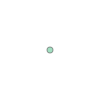

In [ ]:
from shapely.geometry import Point
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

Supondo que temos um polígono, cuja coordenadas são (0, 0), (1, 0), (1, 1) e (0, 1). Ao perguntarmos se o ponto (0.1, 0.9) está dentro deste polígono, o Python responde com ‘True’ ou ‘False’.



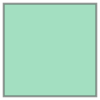

In [ ]:
from shapely.geometry import Polygon
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]])

In [ ]:
Polygon([[0,0], [1,0], [1,1], [0,1], [0,0]]). contains(Point(0.1,0.9))

True

No caso deste projeto, seria algo similar: os imóveis já receberam uma latitude e longitude, o que ainda falta é verificar em qual setor censitário os imóveis se encontram. Ou seja, a longitude e latitude do imóvel é um ponto, enquanto o setor censitário é um polígono também delimitado pelas coordenadas geográficas.

E para facilitar o trabalho com geometrias, fez-se a instalação do GeoPandas.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 16.7 MB 321 kB/s 


In [ ]:
import geopandas as gpd

Para ter acesso às coordenadas dos setores, fez-se a importação de um novo dataset. São quatro arquivos no total, mas basta fazer a importação do arquivo com extensão ‘.shp’ para visualizar as coordenadas dos setores censitários em um dataframe. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
setor_censo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Imersao_Dados_4/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


Verificando se o ponto de latitude e longitude, determinados anteriormente, existem nesta base de dados:

In [ ]:
# Buscando um ponto de longitude e latitude na base de dados dos poligonos censitários
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO']
setor_censo_sp[setor_censo_sp.contains(Point(longitude, latitude))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
54041,119535.00,355030853000029,URBANO,35503085300,None,355030853,MOOCA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,54042,"POLYGON ((-46.59147 -23.56009, -46.59102 -23.5..."


Assim, foi possível adicionar o setor censitário e suas coordenadas a cada linha no dataframe que estávamos trabalhando, através dos pontos de latitude e longitude.

In [ ]:
dados_geo['Point'] = ""
for i in dados_geo.index:
  dados_geo["Point"][i] = Point(dados_geo['longitude'][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


In [ ]:
dados_geo = dados_geo.drop(columns=['apenas_rua'])
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


Alterando o tipo da variável ‘setor_censo’ para o tipo ‘float’:

In [ ]:
dados_geo['setor_censo'] = dados_geo['setor_censo'].astype(float)
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 89977
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5639 non-null   object 
 1   Bairro               8512 non-null   object 
 2   Cidade               8520 non-null   object 
 3   Metragem             8520 non-null   int64  
 4   Quartos              8520 non-null   int64  
 5   Banheiros            8520 non-null   int64  
 6   Vagas                8520 non-null   int64  
 7   Valor                8520 non-null   object 
 8   Moeda                8520 non-null   object 
 9   Valor_anuncio        8520 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  8520 non-null   float64
 12  Valor_m2             8520 non-null   float64
 13  rua                  5639 non-null   object 
 14  cep                  8520 non-null   float64
 15  latitude             8520 non-null   

Com o setor censitário presente no dataframe, foi possível fazer a união destes dados com o dataset do IBGE.

In [ ]:
dados_vendas_censo = pd.merge(left = dados_geo, right=ibge_sp, how='left', left_on='setor_censo', right_on='Cod_setor')
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
8516,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
8517,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [ ]:
dados_vendas_censo.setor_censo

0                     NaN
1      355030871000023.00
2      355030830000050.00
3                     NaN
4                     NaN
              ...        
8515   355030877000099.00
8516   355030816000087.00
8517                  NaN
8518   355030877000052.00
8519   355030893000077.00
Name: setor_censo, Length: 8520, dtype: float64

Nesta hora o Paulo pediu para fazer uma análise entre o preço do metro quadrado dos imóveis com a renda cadastrada no IBGE de 2010.

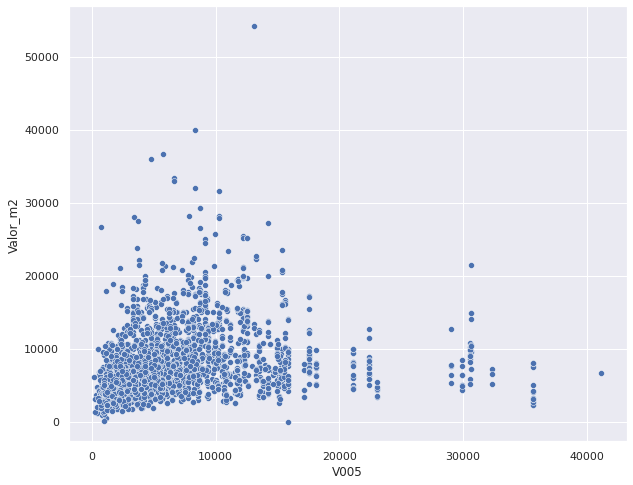

In [ ]:
# V005 = Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes 
# (com e sem rendimento)

plt.figure(figsize=(10, 8))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

Se imaginou que quanto maior fosse a renda, maior seria o preço do metro quadrado do imóvel. Porém, o resultado foi um gráfico disperso, em que houve casos de renda alta e valor do metro quadrado baixo, e outros casos com renda menor e alto valor do imóvel. Nessa hora, a Vivian explicou que se o preço do imóvel fosse equivalente, ou condizente com a renda da família, não haveria necessidade de executar estudos sobre o tema e nem a necessidade de desenvolver métodos de predição. Pois, nem tudo respeita a lógica de quanto maior for o salário, maior será o padrão de vida da pessoa.

In [ ]:
dados_vendas_censo.to_csv('/content/drive/MyDrive/Colab Notebooks/Imersao_Dados_4/dados_aula4.csv', sep=';', index=False)

# Importando os dados para fazer o mapa no Kaggle

# Desafios:

1. Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda (https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da);

2. Repassar a aula para entender melhor o que foi realizado;

3. Aprofundar a análise entre dados de venda e renda;

4. Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

Fazendo uma análise da média de pessoas que residem no setor censitário (V003) e o sua renda (V005), observa-se que a maioria tem uma renda menor do que R$10.000,00 e que a maioria dos setores é composta por famílias com três integrantes.

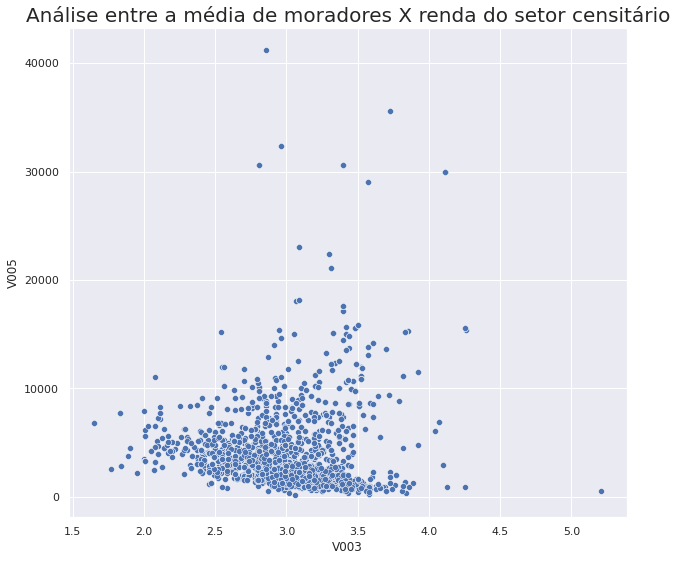

In [ ]:
# V003 = média do número de moradores em domicílios particulares permanentes

plt.figure(figsize=(10, 9))
plt.title('Análise entre a média de moradores X renda do setor censitário', fontsize=20)
sns.scatterplot(data = dados_vendas_censo, x="V003", y="V005");

### GeoPandas - São Paulo

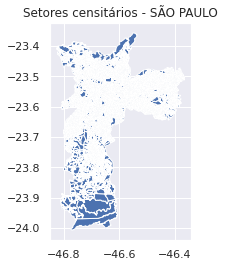

In [ ]:
mapa_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO'].reset_index(drop=True)
ax2 = mapa_sp.plot()
ax2.set_title('Setores censitários - SÃO PAULO');

In [ ]:
# Convertendo para EPSG: 3857

sp_street_map = mapa_sp.to_crs('epsg:3857')

In [ ]:
# Importando o Folium

from folium import Choropleth, Marker
from folium.plugins import MarkerCluster

In [ ]:
import folium
center = [-23.60, -46.6]

m_stamem = folium.Map(location=center,
                      width=500, height=500,
                      tiles='Stamen Toner', zoom_start=12)

m_stamem

In [ ]:
# Create a Open Street Map
m_open_street = folium.Map(location=center, 
                 width=500,height=500,
                 tiles='OpenStreetMap', zoom_start=12)

# Display the map

m_open_street

In [ ]:
dados_geo['centroid'] = dados_geo['Point'].apply(lambda z: (z.centroid.y, z.centroid.x))

A continuação deste desafio foi feita no [Kaggle](https://www.kaggle.com/code/fabianadesouza/imersao-dados-4?kernelSessionId=97477992), pois o Colab travava e perdia a conexão com o servidor enquanto ainda estava trabalhando no mapa da cidade.

### Valor de venda X Renda

In [ ]:
venda_renda = dados_vendas_censo.groupby(['Bairro'])[['Valor_anuncio_float','V005']].agg('mean').round(2)
venda_renda

,Valor_anuncio_float,V005
Bairro,,
Aclimação,1765957.91,4254.72
Alto da Boa Vista,2391250.00,NaN
Alto da Lapa,2063467.11,4777.21
Alto da Mooca,1160823.53,2258.55
Alto de Pinheiros,4764673.89,9895.22
...,...,...
Vila Água Funda,652000.00,1107.70
Água Branca,1226500.00,4134.84
Água Fria,905555.56,3613.36


Ao analisar o preço do imóvel com a renda dos setores, resultou em um gráfico mais disperso do que o gráfico que compara a renda com o preço do metro quadrado.

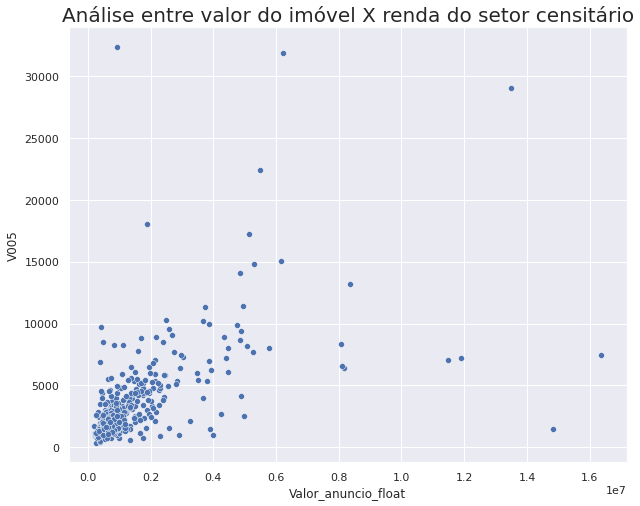

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Análise entre valor do imóvel X renda do setor censitário', fontsize=20)
sns.scatterplot(data = venda_renda, x="Valor_anuncio_float", y="V005");

# Aula 5 - Machine Learning

In [ ]:
# Conteúdo em outro arquivo